In [1]:
from __future__ import print_function, division
%run ../basics.ipynb

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['show_config']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Loading BokehJS ...

Using Theano backend.


In [2]:
df = pd.read_csv('../data/auto_tagging_training_testing_confirmed_tags_2016_09_06.csv')
df['tag'] = df['tag'].apply(lambda x: ' '.join(x.split(' | '))) # exact tags
#df['tag'] = df['all_tag'].apply(lambda x: ' '.join(set([j for i in map(lambda y: y.split('>')[1:], 
#                                                                       x.split(' | ')) for j in i]))) # full tags
display(df.head(2))

print(df.columns)
print(df.count()/len(df)*100)

id  \
0  http://videolectures.net/acml2013_herbrich_rea...   
1  http://videolectures.net/acml2013_lin_cost_sen...   

                                         description  \
0  The last ten years have seen a tremendous grow...   
1  Classification is an important problem in mach...   

                                               title subtitle syllabus  \
0  Distributed, Real-Time Bayesian Learning in On...      NaN      NaN   
1  Cost-sensitive Classification: Algorithms and ...      NaN      NaN   

                               tag  \
0  in_depth machine_learning video   
1  in_depth machine_learning video   

                                             all_tag  fold_num  
0  resource_depth>in_depth | data_science_process...         2  
1  resource_depth>in_depth | data_science_process...         2

Index([u'id', u'description', u'title', u'subtitle', u'syllabus', u'tag',
       u'all_tag', u'fold_num'],
      dtype='object')
id             100.000000
description     83.535109
title          100.000000
subtitle        28.087167
syllabus        11.138015
tag            100.000000
all_tag        100.000000
fold_num       100.000000
dtype: float64


In [3]:
df.head(2)

id  \
0  http://videolectures.net/acml2013_herbrich_rea...   
1  http://videolectures.net/acml2013_lin_cost_sen...   

                                         description  \
0  The last ten years have seen a tremendous grow...   
1  Classification is an important problem in mach...   

                                               title subtitle  \
0  Distributed, Real-Time Bayesian Learning in On...      NaN   
1  Cost-sensitive Classification: Algorithms and ...      NaN   

                               tag syllabus  fold_num  
0  machine_learning video in_depth      NaN         2  
1  machine_learning video in_depth      NaN         2

In [25]:
def all_text(X):
    if isinstance(X, pd.DataFrame):
        concat_x = pd.Series(index=X.index, data='')
        for i in X.columns:
            concat_x += ' ' + X[i].apply(text_cleanup)
        X = concat_x
    #sns.distplot(X.apply(lambda x: len(x.split())), bins=100)
    return X

In [27]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, min_df=5, ngram_range=(1,3))
text = all_text(df[['title', 'description', 'syllabus']])
#for v in pd.unique(df['venue']):
#    sns.distplot(text[df['venue'] == v].apply(lambda x: len(x.split())))
#    plt.title(v)
#    plt.show()
#text = text[text.apply(lambda x: len(x.split())) >= 100]
tfidf = vectorizer.fit_transform(text.values)
words = vectorizer.get_feature_names()
print(tfidf.shape)

(413, 2360)


v v v v 	Topic #0	v v v v v

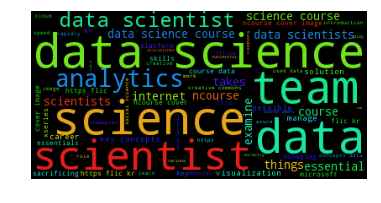

v v v v 	Topic #1	v v v v v

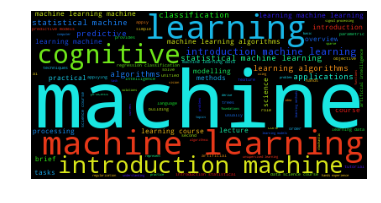

v v v v 	Topic #2	v v v v v

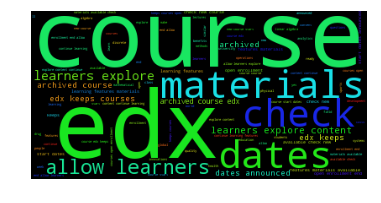

v v v v 	Topic #3	v v v v v

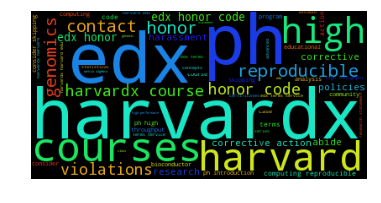

v v v v 	Topic #4	v v v v v

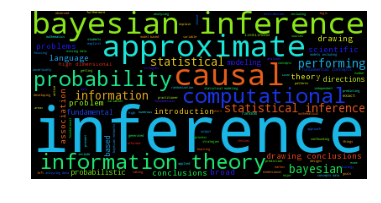

v v v v 	Topic #5	v v v v v

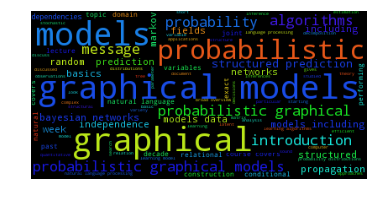

v v v v 	Topic #6	v v v v v

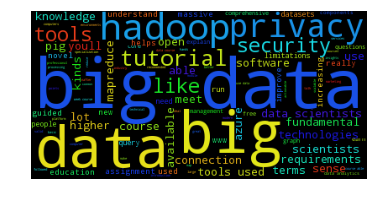

v v v v 	Topic #7	v v v v v

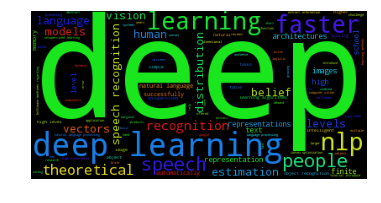

v v v v 	Topic #8	v v v v v

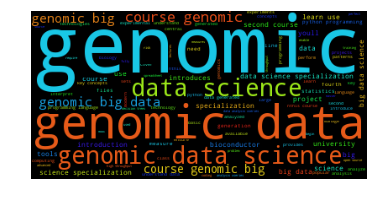

v v v v 	Topic #9	v v v v v

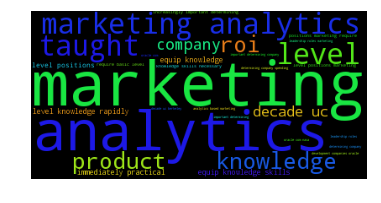

v v v v 	Topic #10	v v v v v

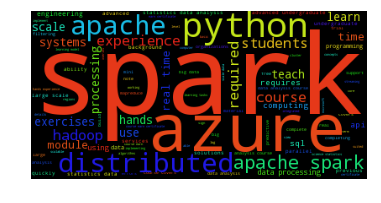

v v v v 	Topic #11	v v v v v

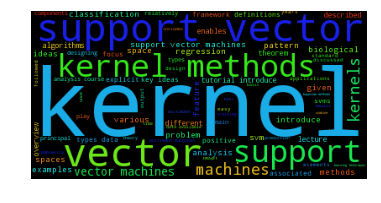

v v v v 	Topic #12	v v v v v

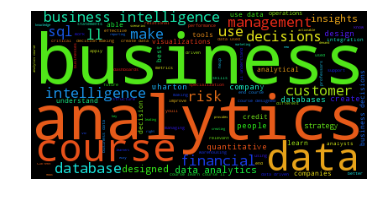

v v v v 	Topic #13	v v v v v

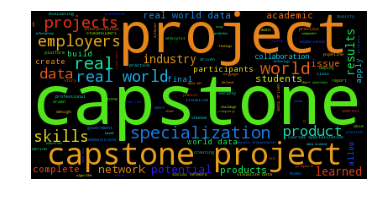

v v v v 	Topic #14	v v v v v

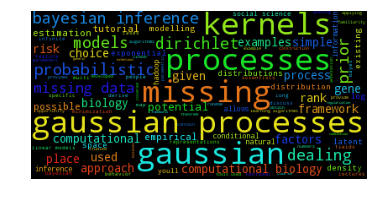

v v v v 	Topic #15	v v v v v

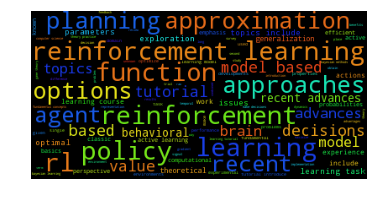

v v v v 	Topic #16	v v v v v

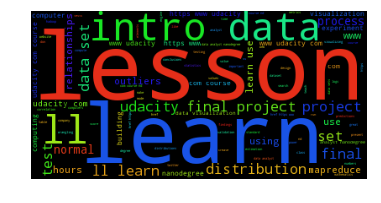

v v v v 	Topic #17	v v v v v

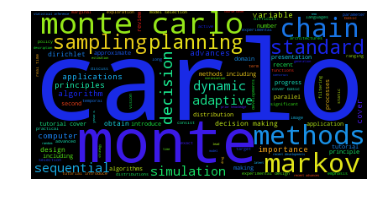

v v v v 	Topic #18	v v v v v

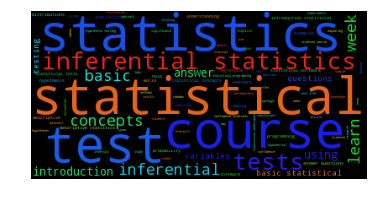

v v v v 	Topic #19	v v v v v

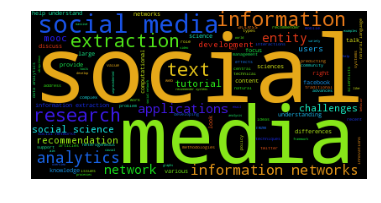

v v v v 	Topic #20	v v v v v

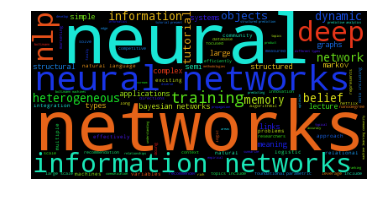

v v v v 	Topic #21	v v v v v

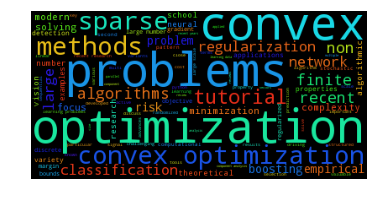

v v v v 	Topic #22	v v v v v

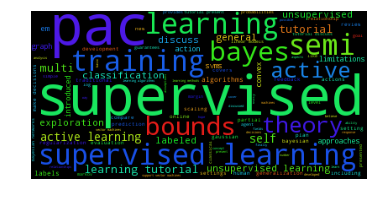

v v v v 	Topic #23	v v v v v

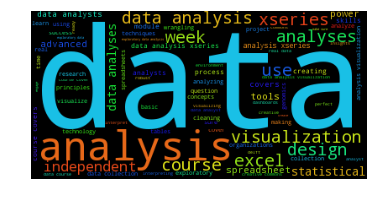

v v v v 	Topic #24	v v v v v

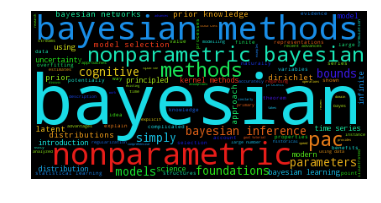

v v v v 	Topic #25	v v v v v

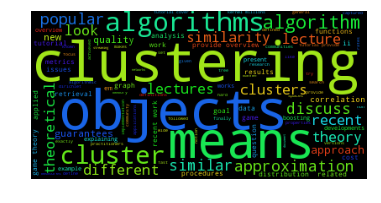

v v v v 	Topic #26	v v v v v

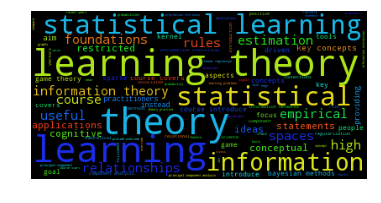

v v v v 	Topic #27	v v v v v

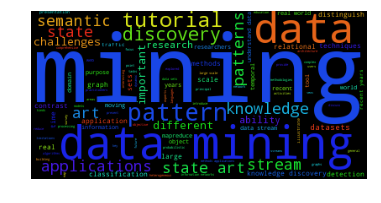

v v v v 	Topic #28	v v v v v

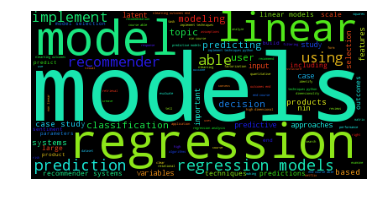

v v v v 	Topic #29	v v v v v

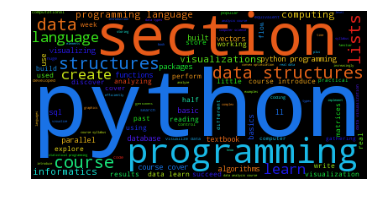

In [35]:
n_topics = 30
n_top_words = 100
nmf = NMF(n_components=n_topics, random_state=1).fit(tfidf)

feature_names = words
topic_dict = dict()
for topic_idx, topic in enumerate(nmf.components_):
    print("v v v v \tTopic #%d\t" % topic_idx, end='v v v v v')
    topic_top_words = [feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]
    topic_top_words_vals = sorted(topic.ravel(), reverse=True)[:n_top_words]
    text_freq = zip(topic_top_words, topic_top_words_vals)
    wordcloud(text_freq)
    topic_top_words = ", ".join(topic_top_words)
    #print(topic_top_words)
    topic_dict[topic_idx] = text_freq

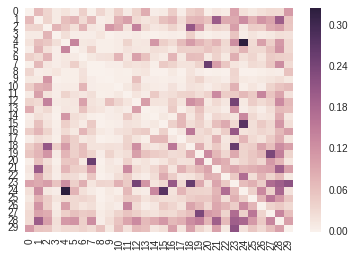

In [36]:
transformed = nmf.transform(tfidf)
df_title_topic = pd.DataFrame(columns=['title'], data=df['title'].values)
df_title_topic['topic id'] = transformed.argmax(axis=1)
plot_topic_coocurrence(transformed)

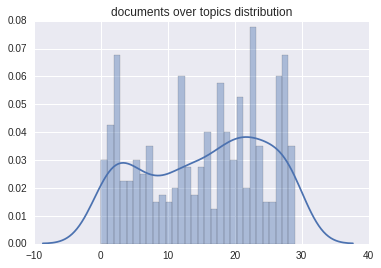

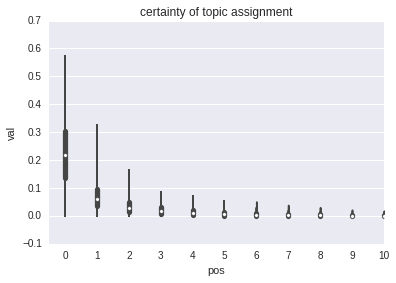

In [37]:
viz_nmf_output(transformed)

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

100%|██████████| 30/30 [00:03<00:00,  9.54it/s]


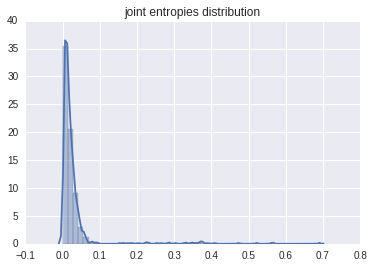

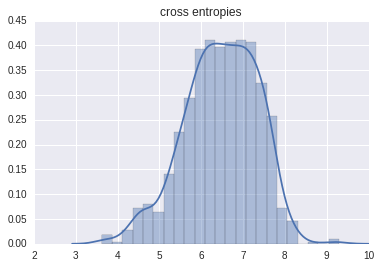

('prereq len:', 293)


t  prereq       val
0  0       4  0.010696
1  0      10  0.066205

In [106]:
%run ../basics.ipynb
dependecies = cross_entropy_prereq(transformed.T, th=0.01)
dependecies.head(2)

293
rank: 0 cross entropy difference: 1.23570526311


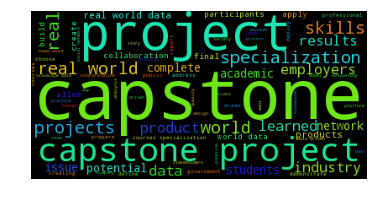

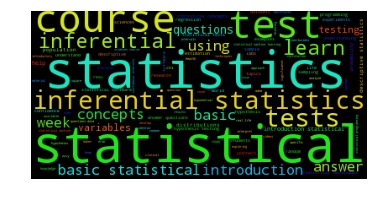

--------------------------------------------------------------------------------
rank: 1 cross entropy difference: 1.22684073472


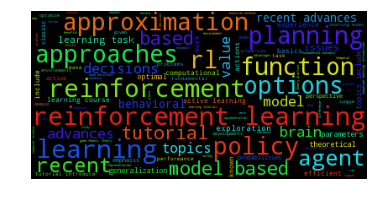

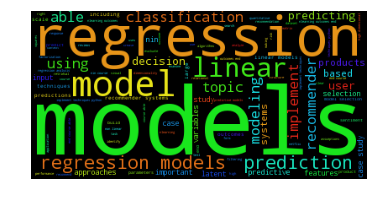

--------------------------------------------------------------------------------
rank: 2 cross entropy difference: 1.21039251511


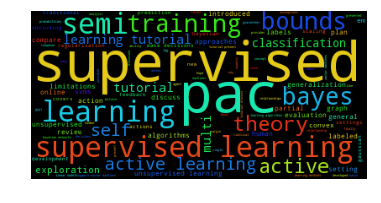

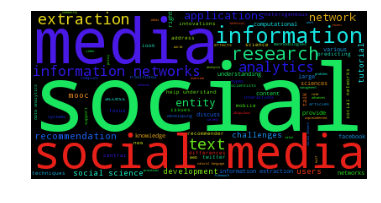

--------------------------------------------------------------------------------
rank: 3 cross entropy difference: 1.21006607044


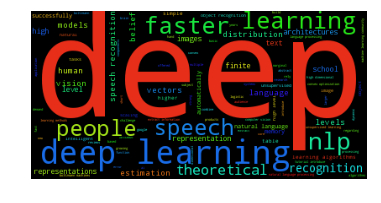

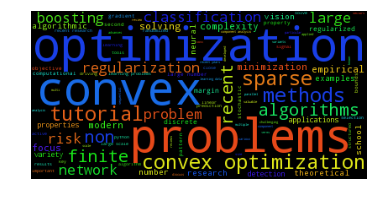

--------------------------------------------------------------------------------
rank: 4 cross entropy difference: 1.20066301163


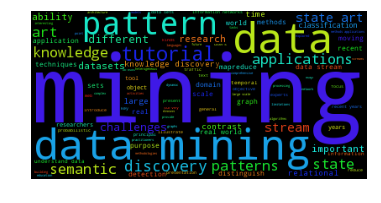

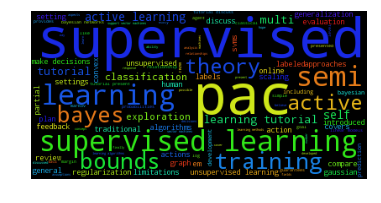

--------------------------------------------------------------------------------
rank: 5 cross entropy difference: 1.18104221945


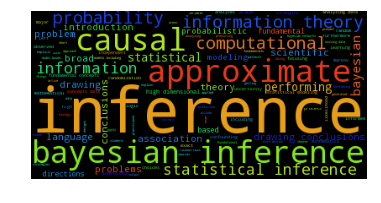

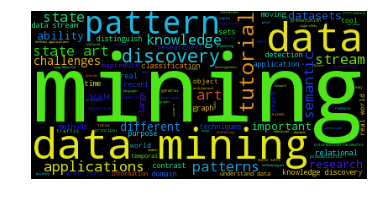

--------------------------------------------------------------------------------
rank: 6 cross entropy difference: 1.17940398061


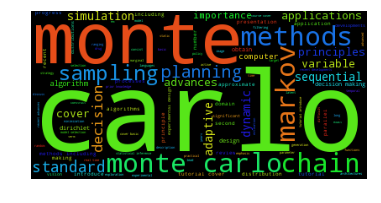

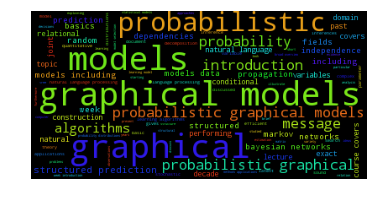

--------------------------------------------------------------------------------
rank: 7 cross entropy difference: 1.1772521736


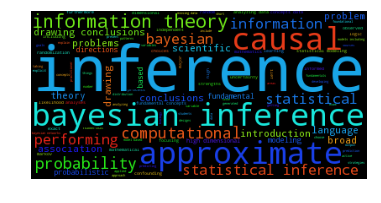

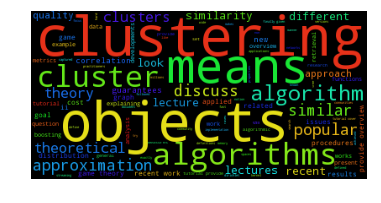

--------------------------------------------------------------------------------
rank: 8 cross entropy difference: 1.17465064068


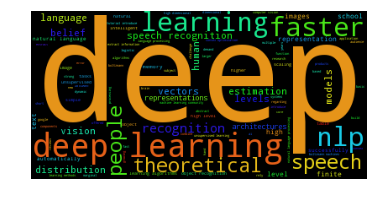

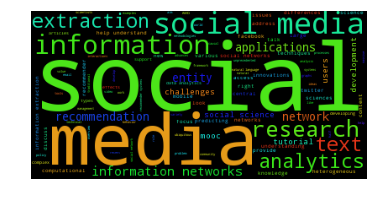

--------------------------------------------------------------------------------
rank: 9 cross entropy difference: 1.15438719679


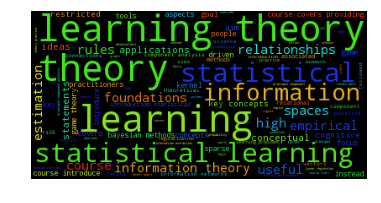

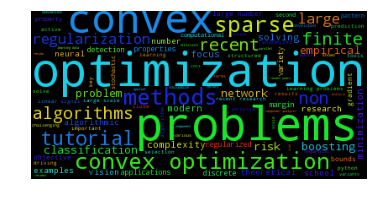

--------------------------------------------------------------------------------
rank: 10 cross entropy difference: 1.14842356886


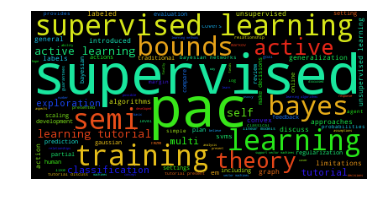

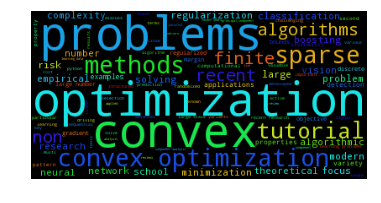

--------------------------------------------------------------------------------
rank: 11 cross entropy difference: 1.13960309581


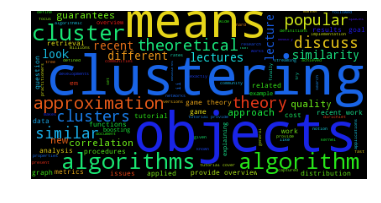

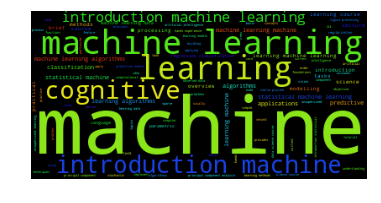

--------------------------------------------------------------------------------
rank: 12 cross entropy difference: 1.13792320277


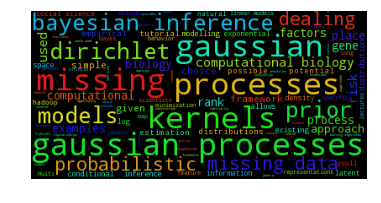

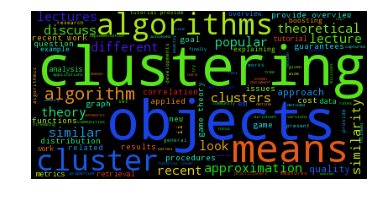

--------------------------------------------------------------------------------
rank: 13 cross entropy difference: 1.12799560786


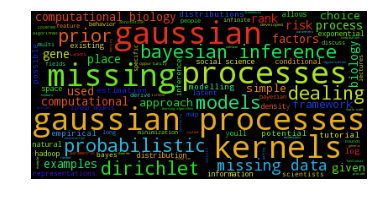

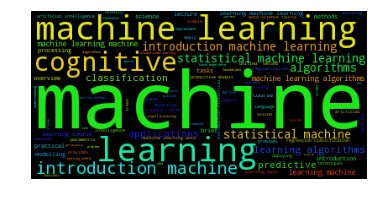

--------------------------------------------------------------------------------
rank: 14 cross entropy difference: 1.12455526574


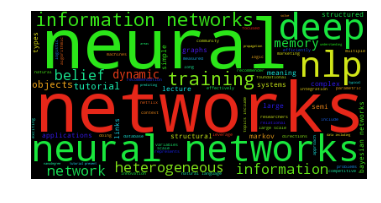

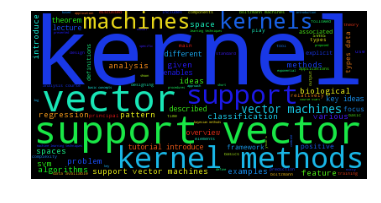

--------------------------------------------------------------------------------
rank: 15 cross entropy difference: 1.09657509447


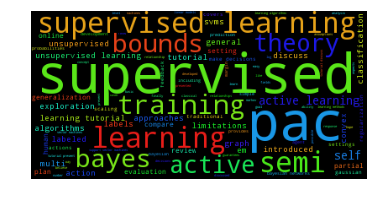

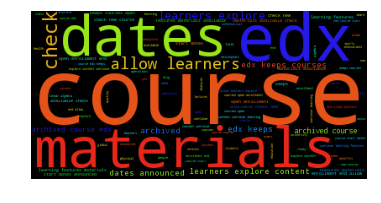

--------------------------------------------------------------------------------
rank: 16 cross entropy difference: 1.08222106779


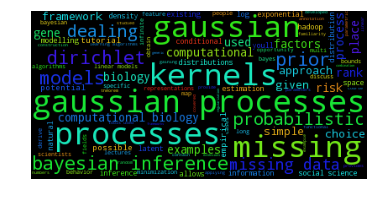

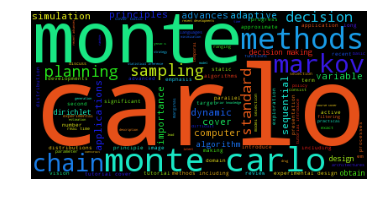

--------------------------------------------------------------------------------
rank: 17 cross entropy difference: 1.08109356556


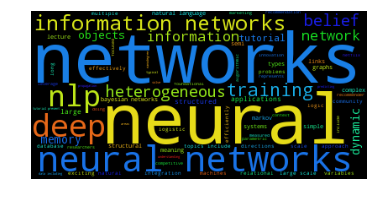

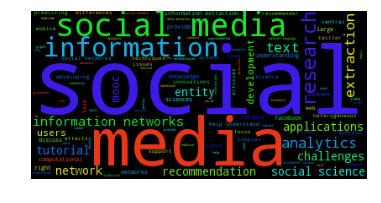

--------------------------------------------------------------------------------
rank: 18 cross entropy difference: 1.07725517139


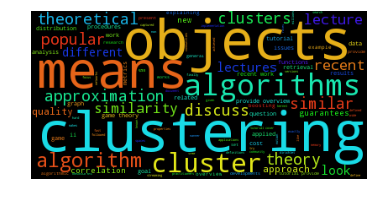

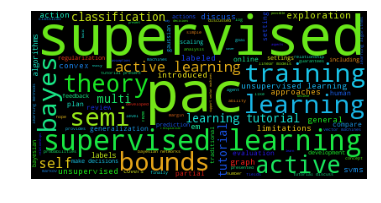

--------------------------------------------------------------------------------
rank: 19 cross entropy difference: 1.07625919387


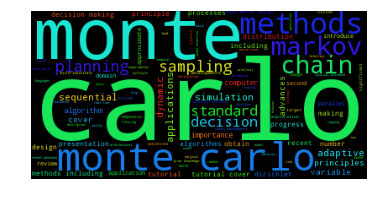

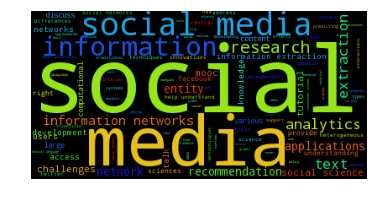

--------------------------------------------------------------------------------


In [107]:
dependecies.sort_values(by='val', ascending=False, inplace=True)

print(len(dependecies))
rank = 0
for idx, (t_id, prereq_id, val) in dependecies[['t', 'prereq', 'val']].iloc[50:70].iterrows():
    print('rank:', rank, 'cross entropy difference:', val)
    rank += 1
    wordcloud(topic_dict[t_id])
    wordcloud(topic_dict[prereq_id])
    print('-' * 80)

In [91]:
dependecies['topic'] = dependecies['t'] #.apply(lambda x: topic_dict[x])
dependecies['prerequisite'] = dependecies['prereq'] #.apply(lambda x: topic_dict[x])
display(dependecies.head(2))

pvt = pd.pivot_table(data=dependecies, index='topic', columns='prerequisite', values='val', aggfunc=lambda x: -1. * np.sum(x))
pvt_vals = pvt.fillna(0).values
for i in range(pvt_vals.shape[0]):
    for j in range(pvt_vals.shape[1]):
        if i == j:
            pvt_vals[i,j] = 0
        elif pvt_vals[i, j] > pvt_vals[j, i]:
            pvt_vals[i, j] = 0
pvt[:] = pvt_vals

t  prereq        val  topic  prerequisite
0  0       1   9.102366      0             1
1  0       2  18.567251      0             2

In [92]:
pvt.head(2)

prerequisite   0         1          2    3         4    5         6   \
topic                                                                  
0             0.0 -9.102366 -18.567251  0.0 -7.076951  0.0 -2.516379   
1             0.0  0.000000   0.000000  0.0  0.000000  0.0  0.000000   

prerequisite         7    9    10    ...       20         21        22  \
topic                                ...                                 
0              0.000000  0.0  0.0    ...      0.0 -13.067427 -2.383686   
1            -11.142564  0.0  0.0    ...      0.0  -7.018471  0.000000   

prerequisite         23        24        25   26         27         28  \
topic                                                                    
0            -35.407481 -5.798155 -4.162803  0.0 -25.520632 -29.279487   
1            -19.768699  0.000000  0.000000  0.0 -10.806778 -20.260232   

prerequisite         29  
topic                    
0            -17.873939  
1             -4.085514  

[2 rows x 29 columns]

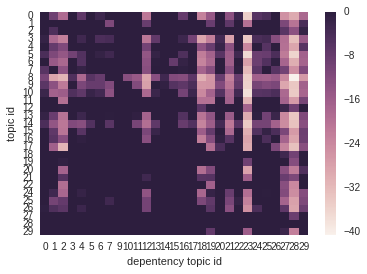

In [93]:
sns.heatmap(pvt)
plt.ylabel('topic id')
plt.xlabel('depentency topic id')
plt.show()

In [94]:
mean_df = pd.DataFrame(pvt.mean(axis=1))
mean_df['topic'] = map(lambda x: topic_dict[x], mean_df.index)
mean_df.sort_values(by=0)

0                                              topic
topic                                                              
8     -16.571001  [(genomic, 1.28453450236), (genomic data, 0.88...
9     -12.947317  [(marketing, 1.39719875182), (analytics, 0.440...
14    -11.527923  [(gaussian processes, 1.02999414901), (process...
3     -10.230210  [(harvardx, 0.814254986639), (ph, 0.5259950956...
10     -9.913320  [(spark, 1.77285333257), (azure, 0.35876062962...
5      -9.125494  [(graphical models, 1.56803271872), (graphical...
0      -8.175248  [(data science, 2.3210892974), (science, 2.033...
6      -7.722196  [(big data, 1.60340048803), (big, 1.5959023674...
13     -7.438353  [(capstone, 1.24630222435), (project, 1.131419...
17     -6.209714  [(carlo, 0.865639162737), (monte, 0.8656391627...
15     -6.037320  [(reinforcement learning, 1.1717947872), (rein...
7      -5.759600  [(deep, 1.60427190548), (deep learning, 1.4043...
16     -5.549038  [(lesson, 1.56354785351), (learn, 0.3742876036...
11     -5.544001  [(kernel, 1.14230725722), (support vector, 0.6...
4      -5.149305  [(inference, 1.3025706033), (bayesian inferenc...
25     -4.800477  [(clustering, 1.16636072392), (objects, 0.3130...
24     -4.512709  [(bayesian, 1.35679936559), (bayesian methods,...
26     -4.025925  [(learning theory, 0.962415271755), (theory, 0...
20     -3.978315  [(networks, 1.16977742946), (neural, 0.8222356...
1      -3.094734  [(machine, 2.03831214507), (machine learning, ...
22     -2.484923  [(supervised, 0.792542131208), (pac, 0.6045246...
21     -1.926753  [(optimization, 0.911567381676), (problems, 0....
29     -1.635682  [(python, 0.71943520779), (section, 0.46797067...
12     -1.235130  [(business, 1.38257870051), (analytics, 0.6394...
2      -0.877183  [(course, 0.589227202622), (edx, 0.32384385287...
19     -0.770734  [(social, 1.00884701869), (media, 0.4853102775...
18     -0.422939  [(statistical, 0.792398520669), (statistics, 0...
27     -0.300799  [(mining, 1.13369171623), (data mining, 0.6342...
28      0.000000  [(models, 0.750884722692), (regression, 0.4516...

In [95]:
topic_dep = pd.DataFrame(columns=['dep'], data=pvt.idxmax(axis=1))
topic_dep['dep val'] = pvt.max(axis=1)
topic_dep.head(2)

dep  dep val
topic              
0        0      0.0
1        0      0.0

In [96]:
topic_dep.sort_values(by='dep val', ascending=False, inplace=True)
topic_dep['topic'] = map(lambda x: topic_dict[x], topic_dep.index)
topic_dep['topic dep.'] = map(lambda x: np.nan if x not in topic_dict else topic_dict[x], topic_dep['dep'])
prereq_list = list()
for idx, (dep_val, topic, dep, dep_id) in topic_dep[['dep val', 'topic', 'topic dep.', 'dep']].iterrows():
    if dep_val > .01:
        print('-'*80)
        print(dep_val)
        print('topic id:', idx, 'prereq topic id:', dep_id)
        prereq_list.append((idx, dep_id))
        wordcloud(topic)
        print('^^^^^^^')
        wordcloud(dep)

In [97]:
%run basics.ipynb
tmp = df_title_topic.copy()
tmp['title'] = tmp['title'].apply(lambda x: x.replace(' - VideoLectures.NET', ""))
pg = get_prereq_graph(tmp.values, prereq_list)

<Graph object, directed, with 403 vertices and 0 edges at 0x7fe1001ae890>


ValueError: zero-size array to reduction operation maximum which has no identity

In [ ]:
dep_df = dependecies.groupby(by=('topic', 'dependency'),as_index=False).mean().sort_values(by='diff2top')
dep_df['topic'] = map(lambda x: topic_dict[x], dep_df['topic'])
dep_df['dependency'] = map(lambda x: topic_dict[x], dep_df['dependency'])
dep_df